In [1]:
!pip install yfinance
import yfinance as yf
ticker_symbol = 'TSLA'
ticker_data = yf.Ticker(ticker_symbol)
ticker_df = ticker_data.history(period='max')
print(ticker_df.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Specify the URL of the webpage you want to scrape
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Send HTTP request to specified URL and save the response from server in a response object called r
r = requests.get(url)

# Create a BeautifulSoup object and specify the parser
soup = BeautifulSoup(r.text, 'html.parser')

# Scrape the data
tables = soup.find_all('table') # all table tags within the HTML
for index, table in enumerate(tables):
    if ("Tesla Quarterly Revenue" in str(table)):
        table_index = index
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        date = col[0].text
        revenue = col[1].text.strip().replace("$", "").replace(",", "")
        tesla_revenue = tesla_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

# Print the last five rows
print(tesla_revenue.tail())

          Date Revenue
51  2010-06-30      28
52  2010-03-31      21
53  2009-12-31        
54  2009-09-30      46
55  2009-06-30      27


In [3]:
import yfinance as yf

# Define the ticker symbol
ticker_symbol = 'GME'

# Get data on this ticker
ticker_data = yf.Ticker(ticker_symbol)

# Get the historical prices for this ticker
gme_data = ticker_data.history(period='max')

# Reset the index
gme_data.reset_index(inplace=True)

# Show the first 5 rows of the dataframe
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Specify the URL of the webpage to scrape
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Send HTTP request to specified URL and save the response from the server in a response object called r
r = requests.get(url)

# Create a BeautifulSoup object and specify the parser
soup = BeautifulSoup(r.text, 'html.parser')

# Scrape the data
tables = soup.find_all('table') # find all table tags within the HTML
for index, table in enumerate(tables):
    if ("GameStop Quarterly Revenue" in str(table)):
        table_index = index
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        date = col[0].text
        revenue = col[1].text.strip().replace("$", "").replace(",", "")
        gme_revenue = gme_revenue.append({"Date":date, "Revenue":revenue}, ignore_index=True)

# Print the last five rows
print(gme_revenue.tail())

          Date Revenue
53  2010-01-31    3524
54  2009-10-31    1835
55  2009-07-31    1739
56  2009-04-30    1981
57  2009-01-31    3492


In [17]:
print(tesla_data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')


In [18]:
tesla_data['Date'] = tesla_data.index

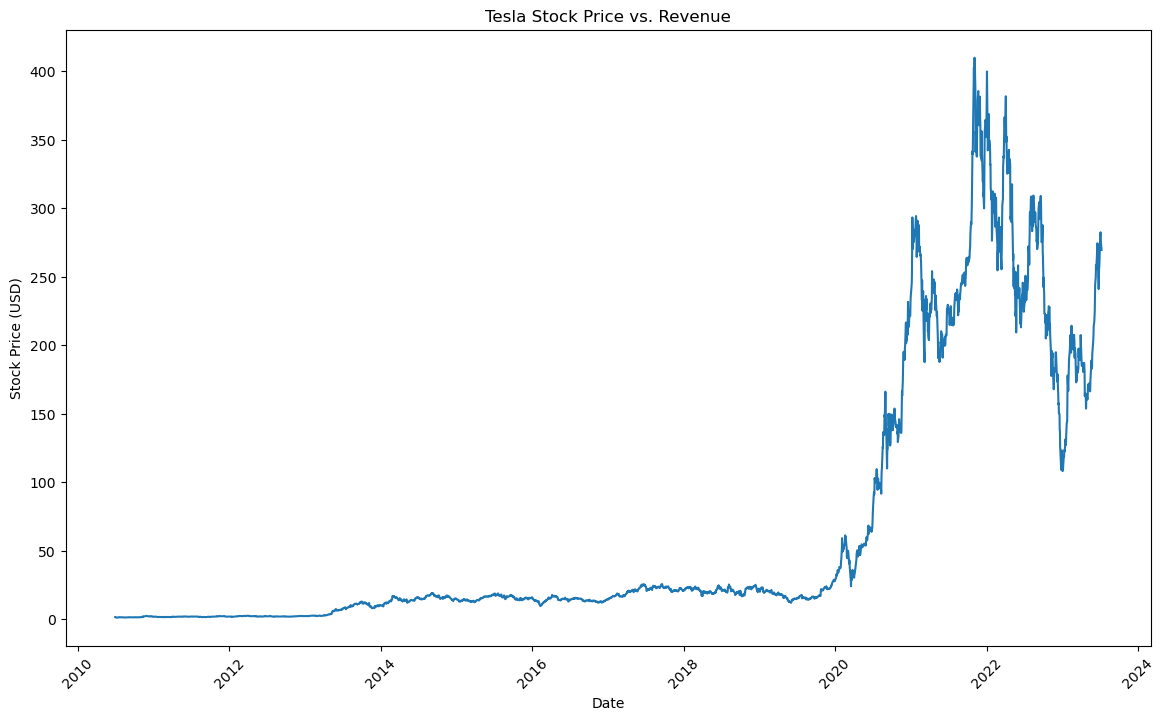

In [20]:
import matplotlib.pyplot as plt
def make_graph(stock_data, revenue_data, stock):
    plt.figure(figsize=(14,8))
    plt.plot(stock_data['Date'], stock_data['Close'], label=f'{stock} Stock Price')
    plt.title(f'{stock} Stock Price vs. Revenue')
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.xticks(rotation=45)
    plt.show()
make_graph(tesla_data, tesla_revenue, 'Tesla')

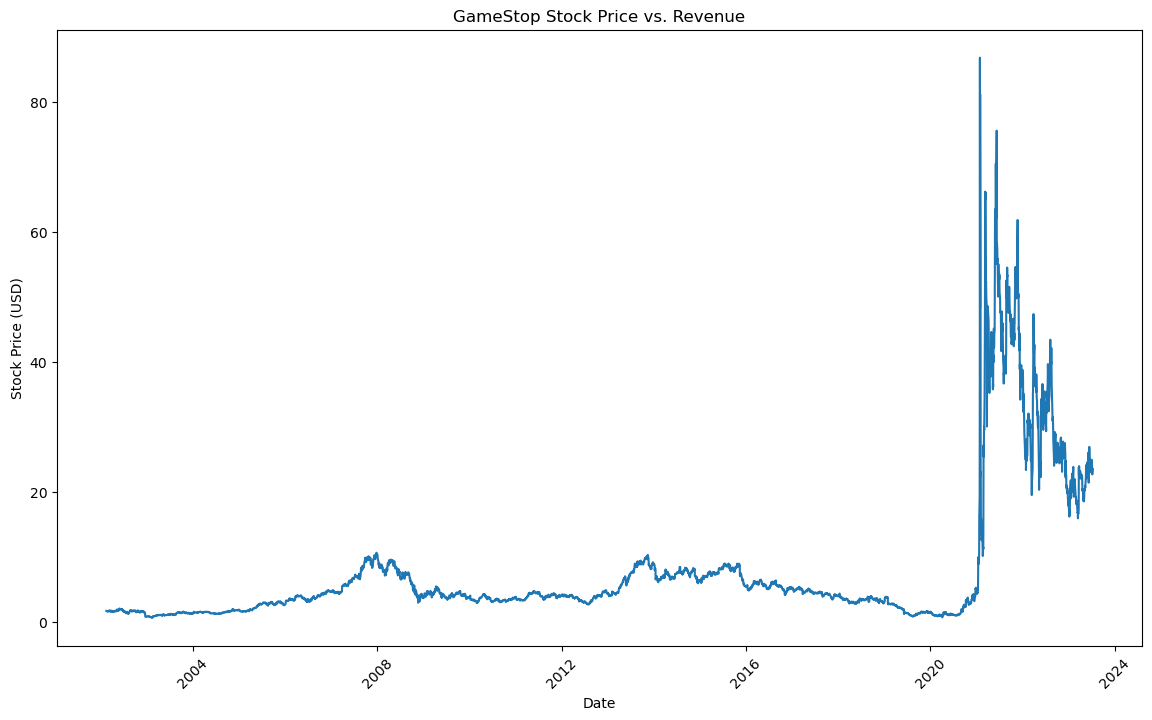

In [21]:
make_graph(gme_data, gme_revenue, 'GameStop')